# Optimization - Virtual Laminas Distribution

This notebook explains the ideas behind the "Smart Laminas" method. This method was created to make the representation of the variation of volume fractions along the thickness of a plate made of Functionally Graded Material more accurate.

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 - Volume Fraction Function

In [2]:
V = lambda z, p: 1 - z ** p
z = lambda V, p: (1 - V) ** (1 / p)

## 2 - "Smart Laminas" Method Function

In [17]:
def smart_laminas(n, p):
    # Variáveis Iniciais
    points_z = list()
    points_V = list()
    fractions_z = list()
    fractions_V = list()
    thickness_z = list()
    thickness_V = list()
    V = lambda z: 1 - z ** p
    z = lambda V: (1 - V) ** (1 / p)
    
    # Calculando Z de Referência
    if p == 1:
        z_ref = 0.5
    else:
        z_ref = p ** (-1 / (p - 1))
    
    # Decidindo se a Região de Prioridade z está à Esquerda ou Direita
    V_ref = V(z_ref)
    slope_tendency = -p * (p - 1) * z_ref ** (p - 2)
    if slope_tendency > 0:
        l_V = 1 - V_ref
        l_z = 1 - z_ref
    else:
        l_V = V_ref
        l_z = z_ref

    # Parâmetros da Região de Prioridade V
    n_V = round(l_z * n)
    step_V = l_V / n_V
    if slope_tendency > 0:
        z_0 = 0
        V_i = 1 - step_V / 2
    else:
        z_0 = z_ref
        V_i = V_ref - step_V / 2

    # Gerando Laminas da Região de Prioridade V 
    for _ in range(n_V):
        # Calculando Espessura Variável
        h_i = z(V_i - step_V / 2) - z_0

        # Registrando Informações
        points_V.append(z(V_i))
        fractions_V.append(V_i)
        thickness_V.append(h_i)

        # Atualizando Fração de Volume e Referência para Espessura
        V_i -= step_V
        z_0 += h_i
    
    # Parâmetros da Região de Prioridade z
    n_z = n - n_V
    step_z = l_z / n_z
    if slope_tendency > 0:
        z_i = z_ref + step_z / 2
    else:
        z_i = step_z / 2

    # Gerando Laminas da Região de Prioridade z
    for _ in range(n_z):
        points_z.append(z_i)
        fractions_z.append(V(z_i))
        thickness_z.append(step_z)
        z_i += step_z
    
    # Mesclando Regiões
    if slope_tendency > 0:
        points = points_z + points_V
        fractions = fractions_z + fractions_V
        thickness = thickness_z + thickness_V
    else:
        points = points_V + points_z
        fractions = fractions_V + fractions_z
        thickness = thickness_V + thickness_z

    return points, fractions, thickness, z_ref

## 3 - Method Comparisson

In [12]:
def comparate(n, p):
    za = np.linspace(0, 1, 1000)
    ze = np.arange(1 / n / 2, 1, 1 / n)
    z, f, h, ref = smart_laminas(n, p)
    
    fig, axs = plt.subplots(1, 2)
    fig.set_size_inches(12, 4)

    axs[0].set_title(f'Smart Laminas for N = {p} ({n})')
    axs[0].set_xlabel('z')
    axs[0].set_ylabel('V')
    axs[0].plot(za, V(za, p), label='Real Curve')
    axs[0].scatter(z, f, c='red', label='Virtual Laminas')
    axs[0].axvline(ref, color='green', label='z for dV/dz = -1')

    axs[1].set_title(f'Same Thickness Laminas for N = {p} ({n})')
    axs[1].set_xlabel('z')
    axs[1].set_ylabel('V')
    axs[1].plot(za, V(za, p), label='Real Curve')
    axs[1].scatter(ze, V(ze, p), c='red', label='Virtual Laminas')

    axs[0].grid()
    axs[1].grid()
    axs[0].legend()
    axs[1].legend()
    plt.show()

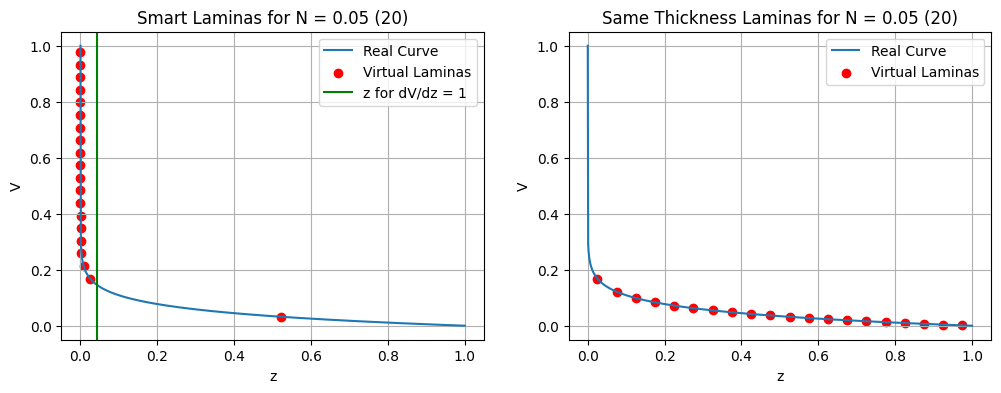

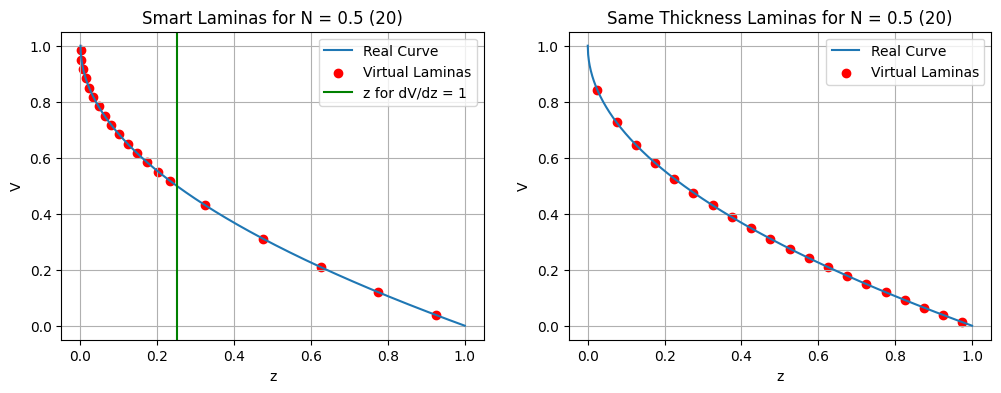

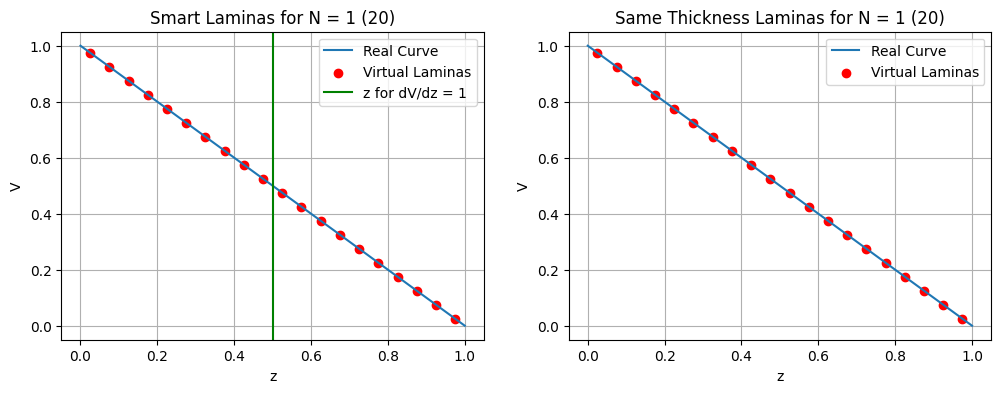

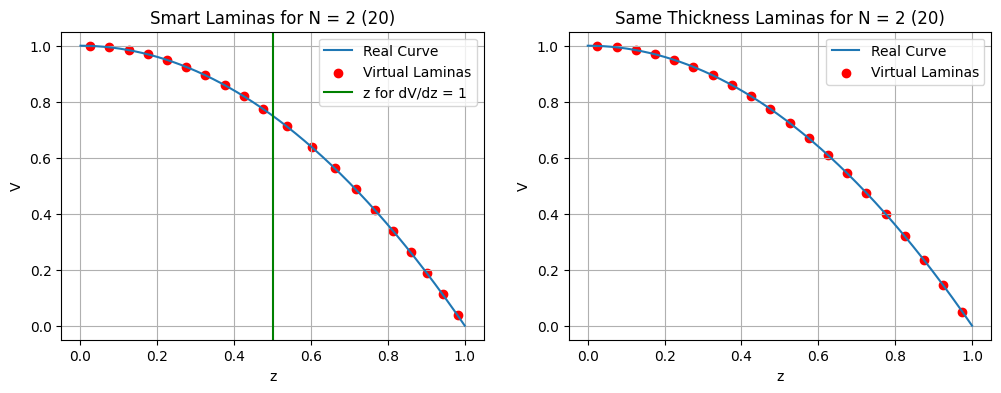

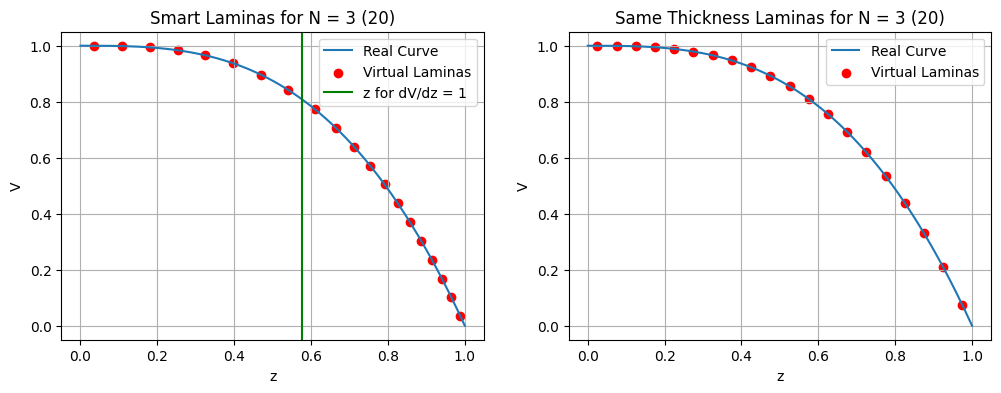

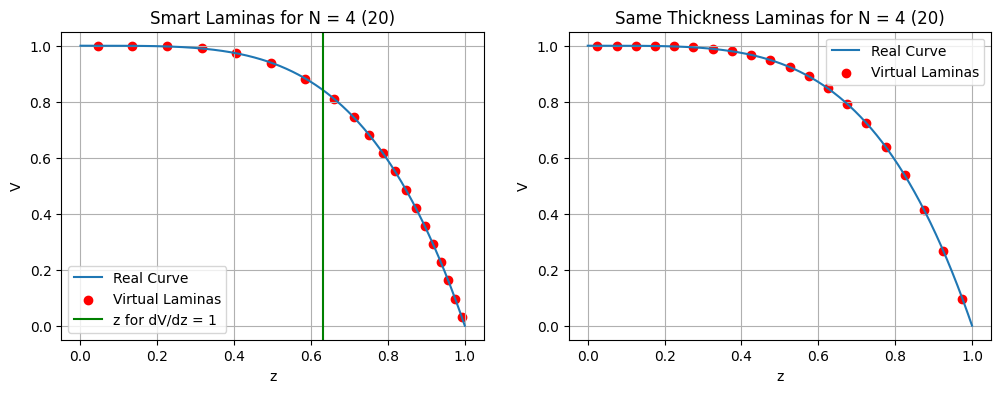

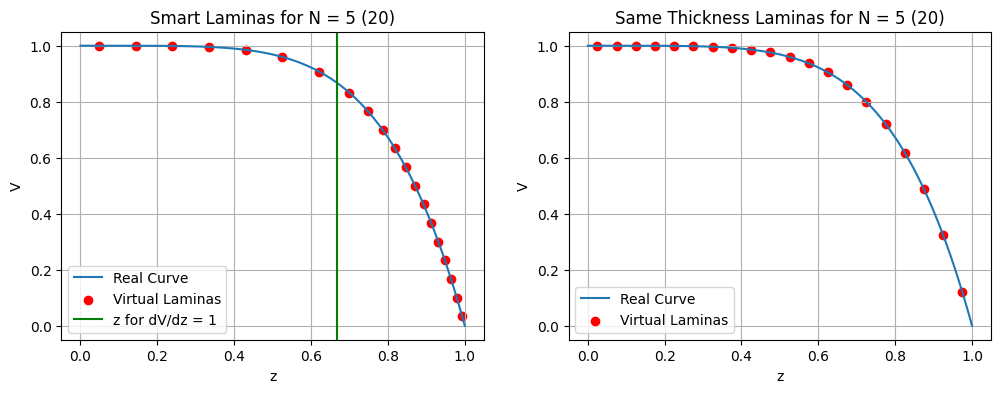

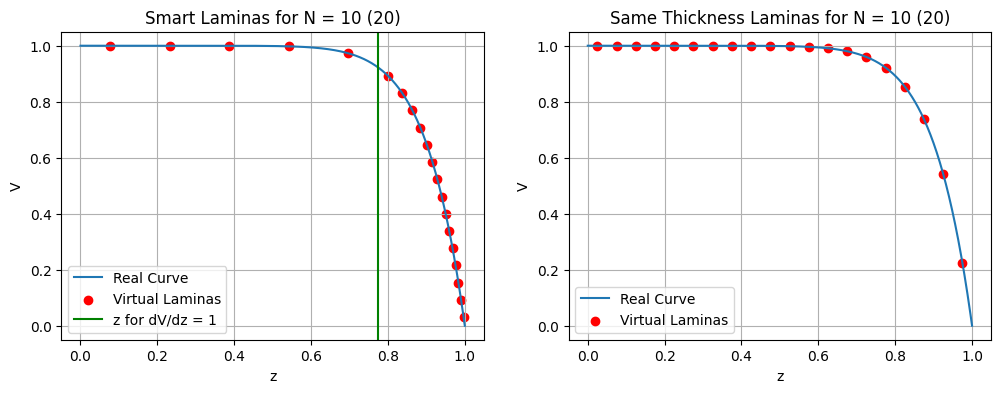

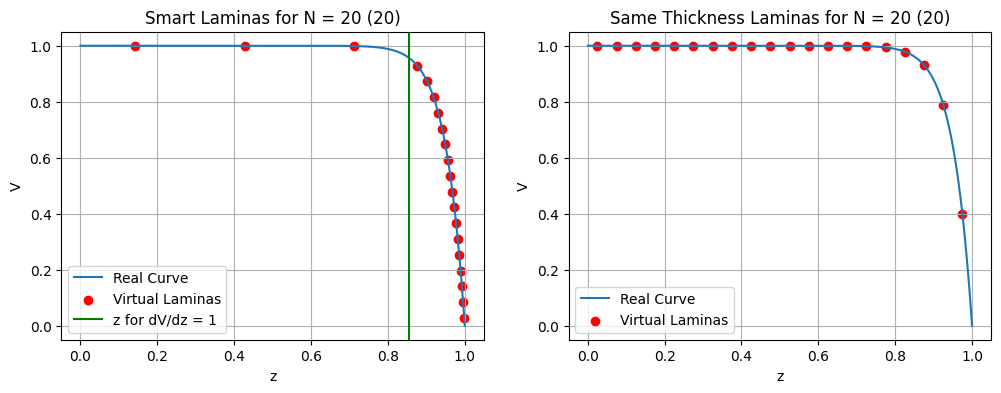

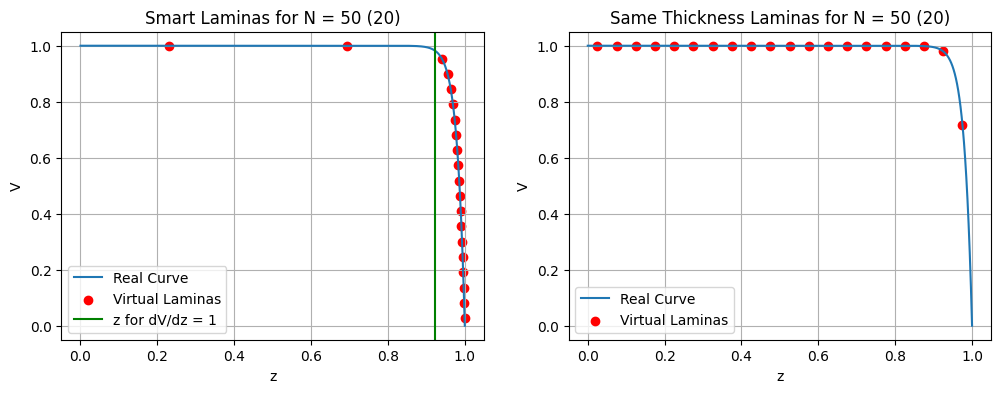

In [18]:
n = 20
grades = [0.05, 0.5, 1, 2, 3, 4, 5, 10, 20, 50]
for g in grades:
    comparate(n, g)